# IRIS FLOWER CLASSIFICATION

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/INTERNSHIP/OASIS INFOBYTE/DATA SCIENCE/Assignment 1/Iris.csv ")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa


In [4]:
# copying the data--
data.copy()
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# data analysis--
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
print(data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# checking the missing values--
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
data.shape

(150, 6)

In [13]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Data Preprocessing

In [14]:
data.drop("Id",axis=1,inplace=True)

# Exploratory Data Analysis

<Axes: >

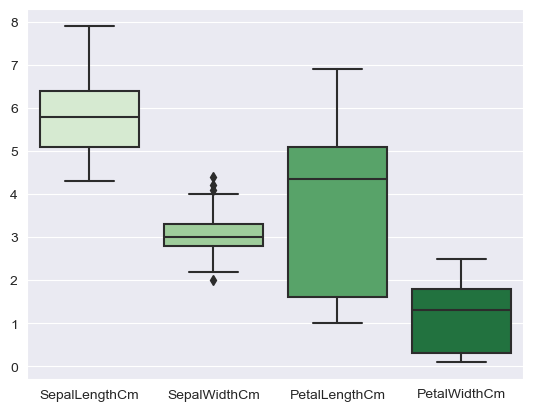

In [15]:
# checking the outliers--
sns.set_style("darkgrid")
sns.boxplot(data=data.loc[:, ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],palette="Greens")

<Axes: ylabel='SepalLengthCm'>

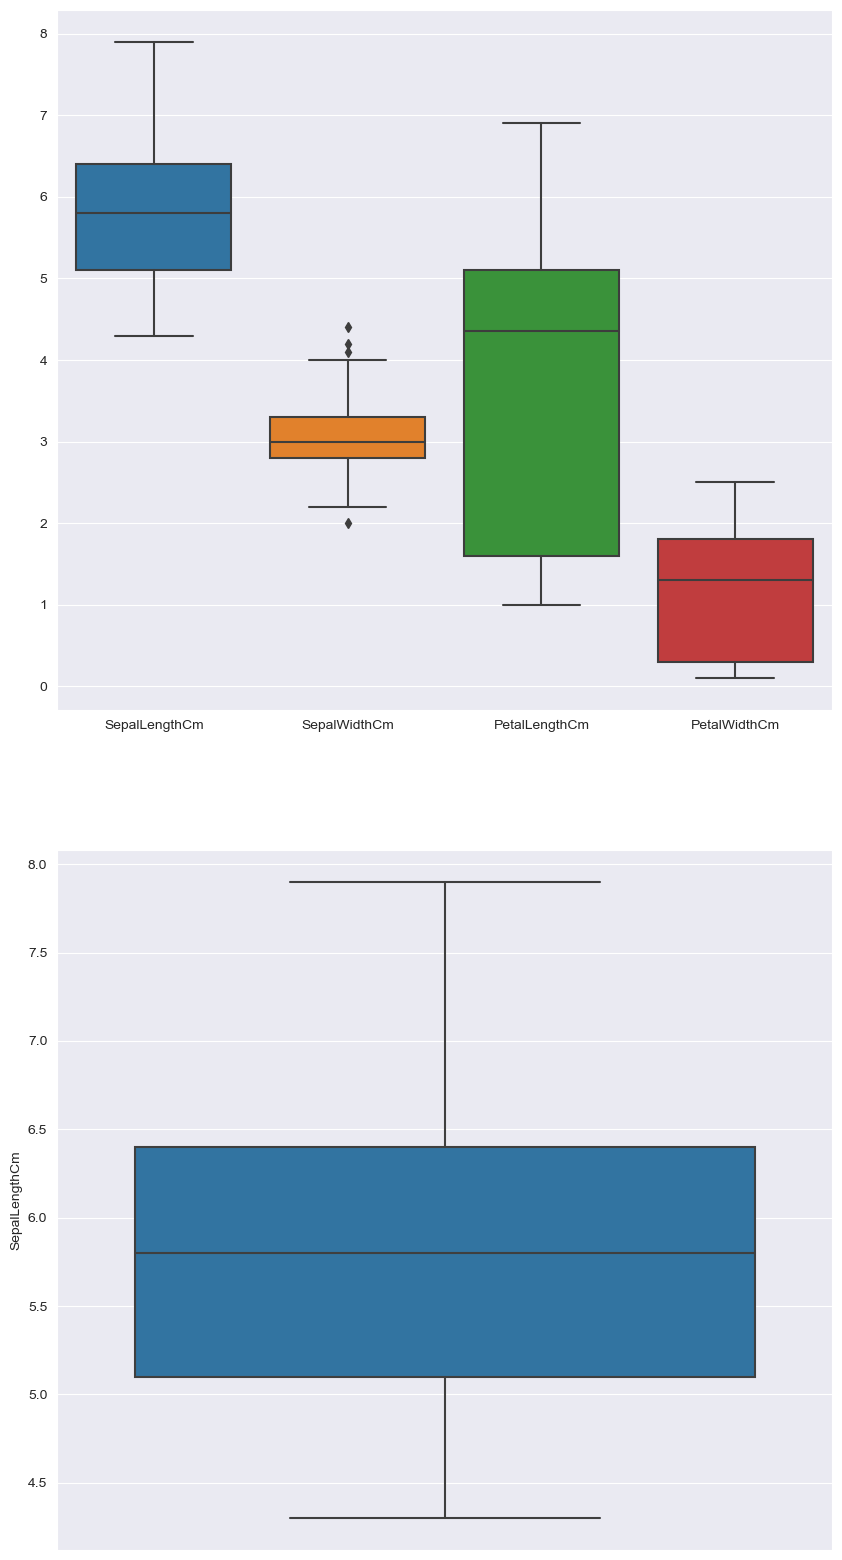

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="SepalLengthCm",orient="Species",ax=axes[1])

<Axes: ylabel='SepalWidthCm'>

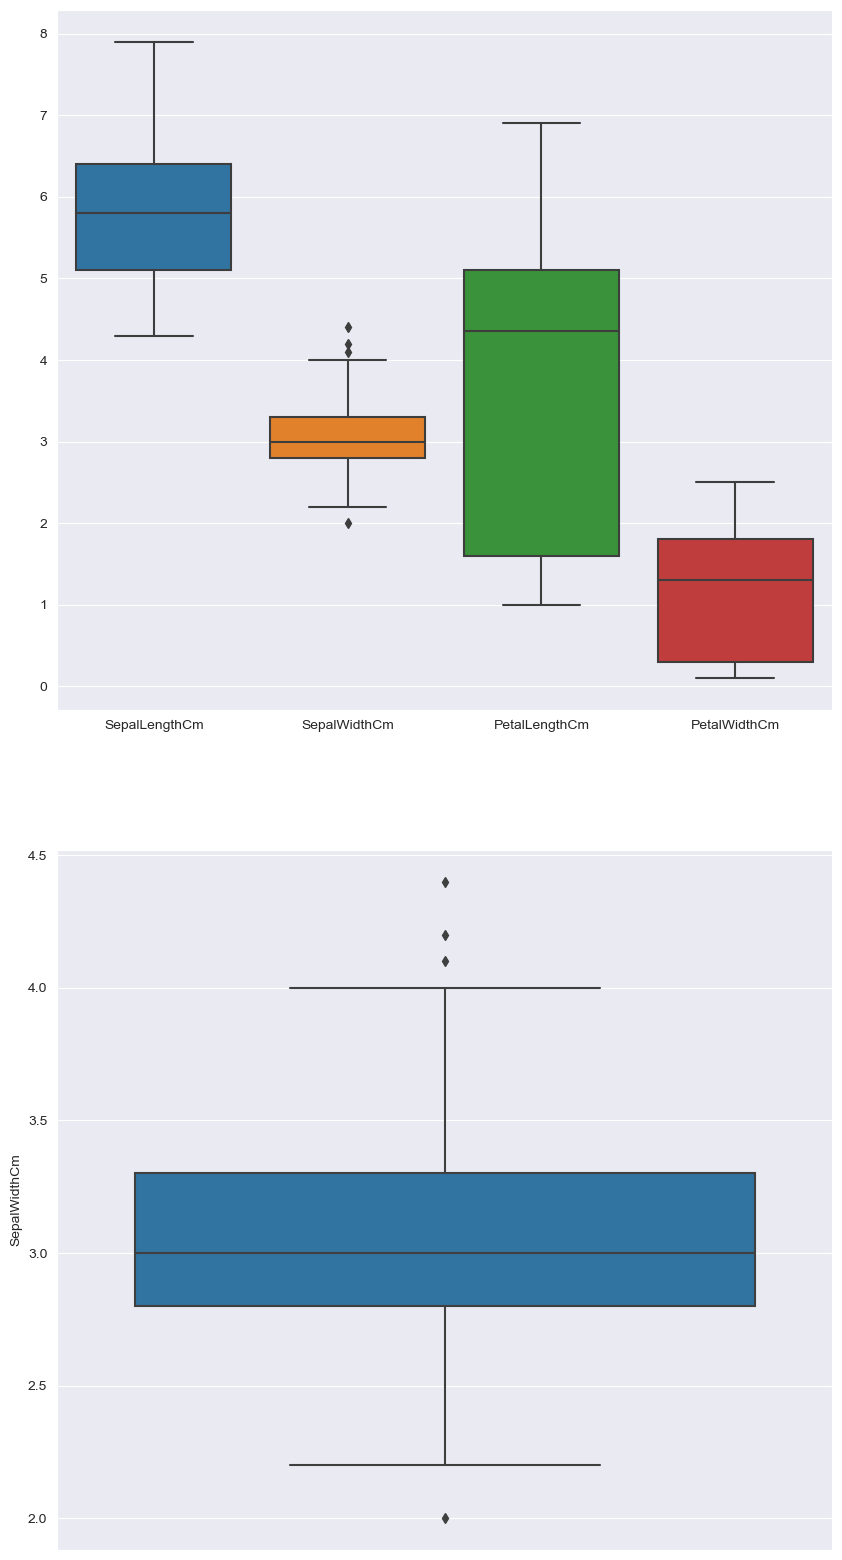

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="SepalWidthCm",orient="Species",ax=axes[1])

<Axes: ylabel='PetalLengthCm'>

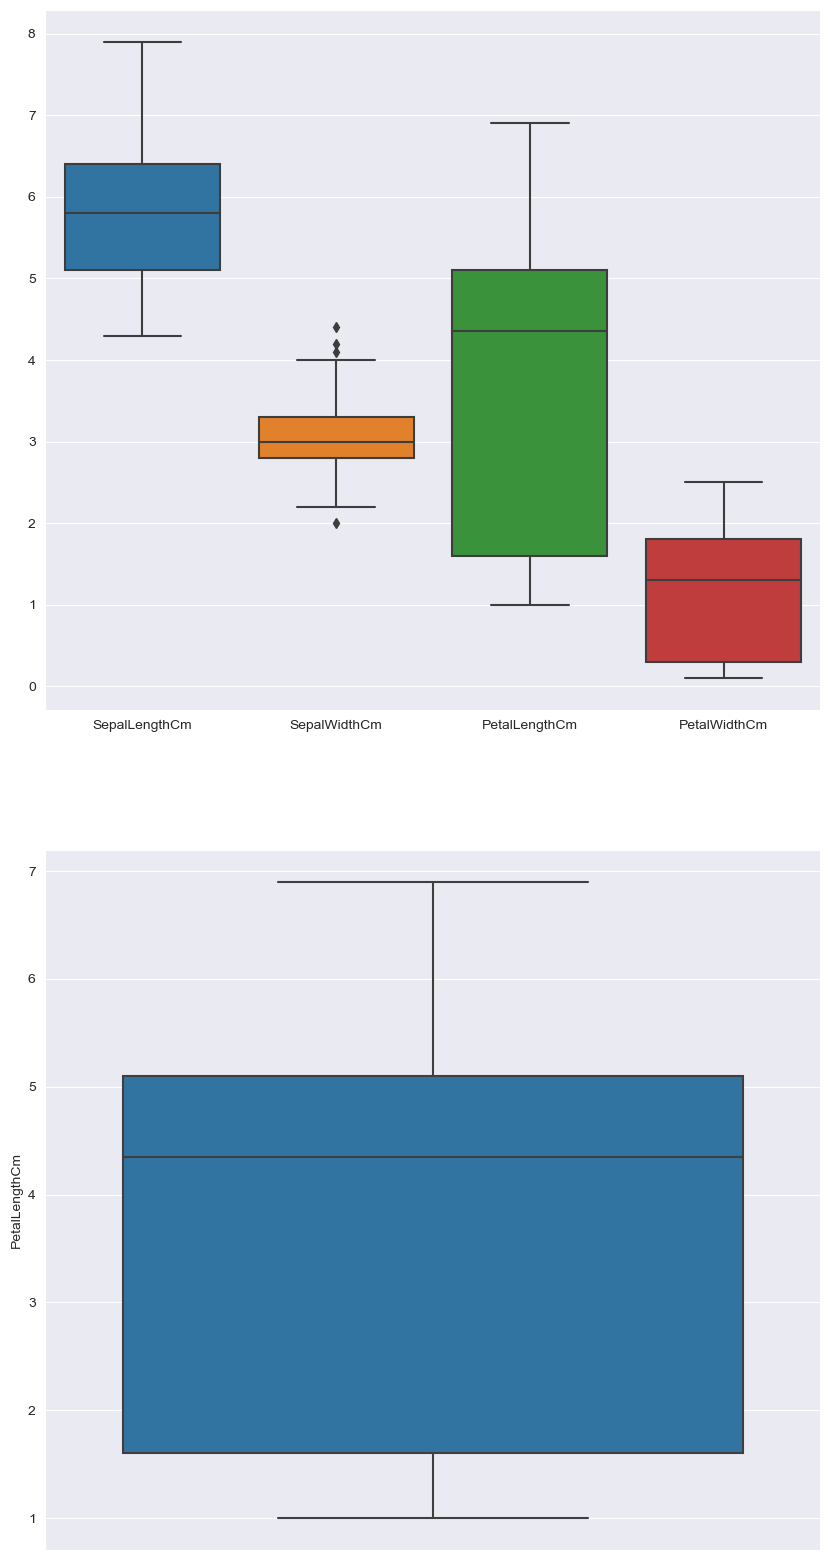

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="PetalLengthCm",orient="Species",ax=axes[1])

<Axes: ylabel='PetalWidthCm'>

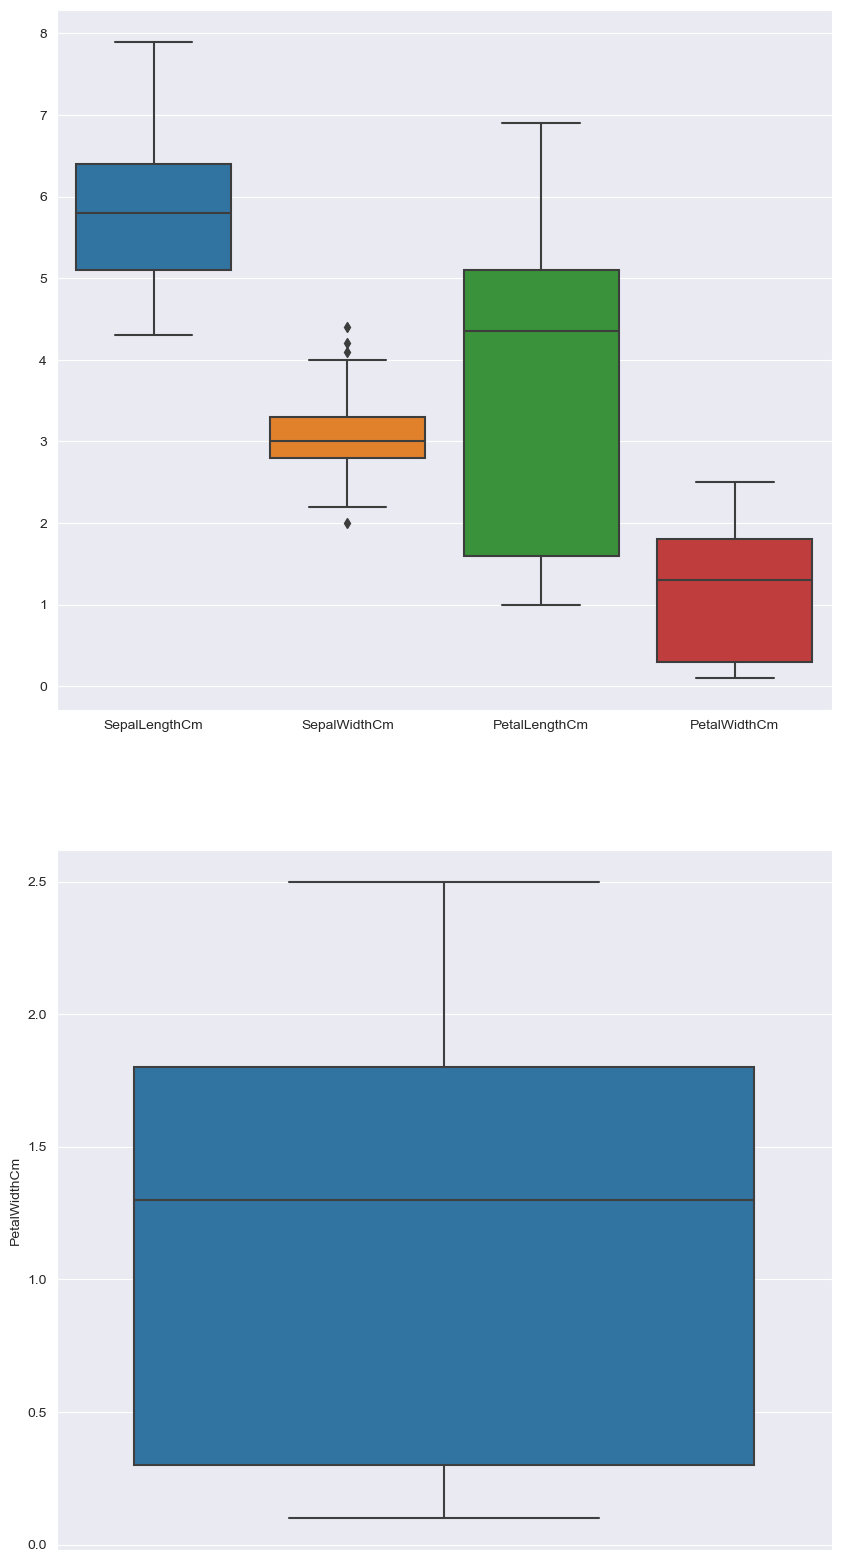

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="PetalWidthCm",orient="Species",ax=axes[1])

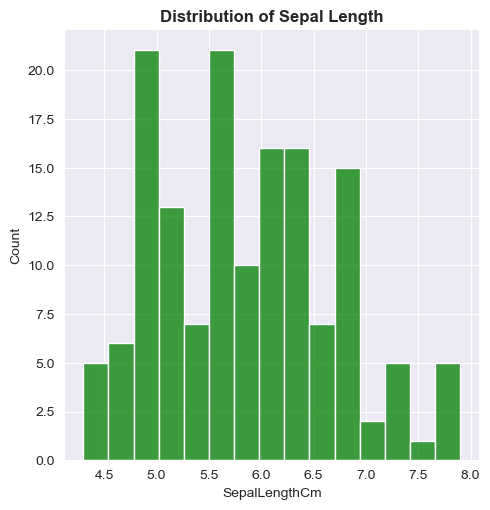

In [20]:
sns.displot(x=data["SepalLengthCm"],bins=15,color="green")
data["SepalLengthCm"].mean()
plt.title("Distribution of Sepal Length",fontweight="bold")
plt.show()

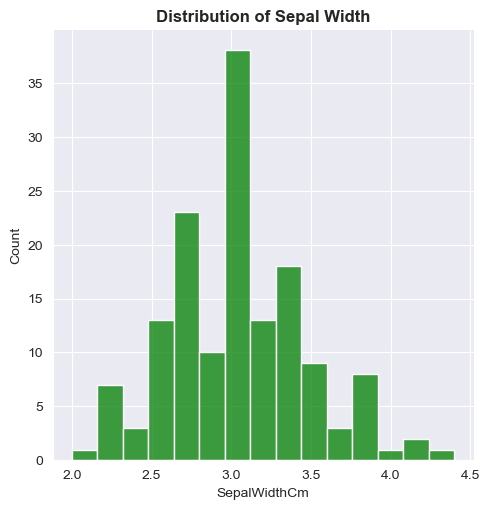

In [21]:
sns.displot(x=data["SepalWidthCm"],bins=15,color="green")
data["SepalWidthCm"].mean()
plt.title("Distribution of Sepal Width",fontweight="bold")
plt.show()

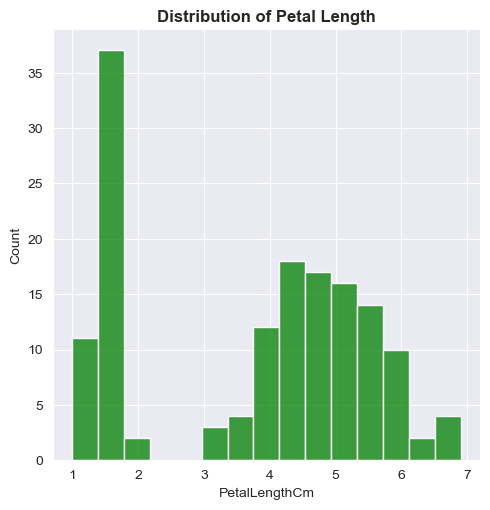

In [22]:
sns.displot(x=data["PetalLengthCm"],bins=15,color="green")
data["PetalLengthCm"].mean()
plt.title("Distribution of Petal Length",fontweight="bold")
plt.show()

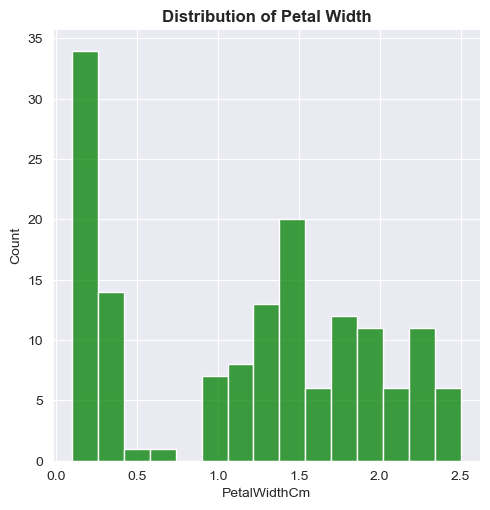

In [23]:
sns.displot(x=data["PetalWidthCm"],bins=15,color="green")
data["PetalWidthCm"].mean()
plt.title("Distribution of Petal Width",fontweight="bold")
plt.show()

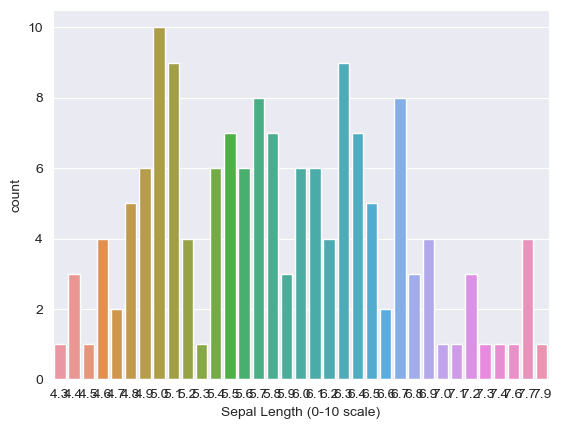

In [24]:
sns.countplot(x="SepalLengthCm", data=data)
plt.xlabel("Sepal Length (0-10 scale)")
plt.show()

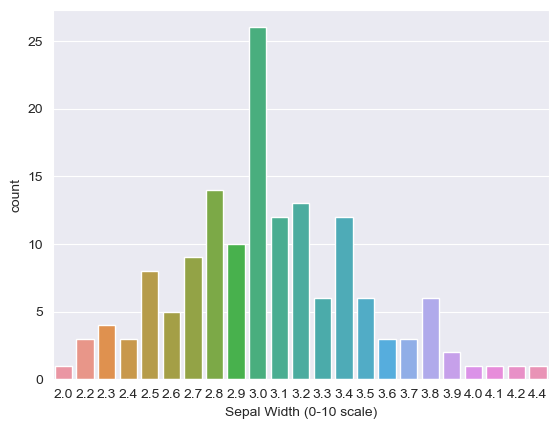

In [25]:
sns.countplot(x="SepalWidthCm", data=data)
plt.xlabel("Sepal Width (0-10 scale)")
plt.show()

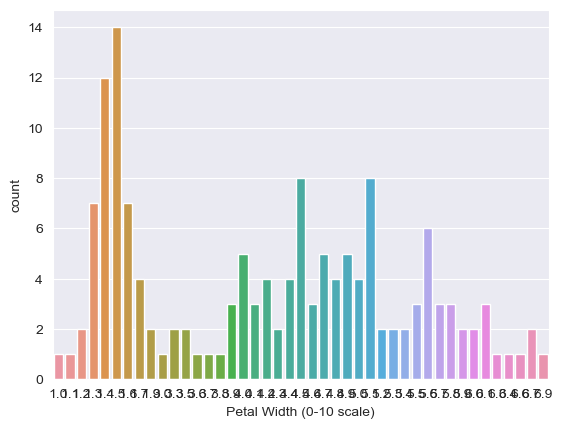

In [26]:
sns.countplot(x="PetalLengthCm", data=data)
plt.xlabel("Petal Width (0-10 scale)")
plt.show()

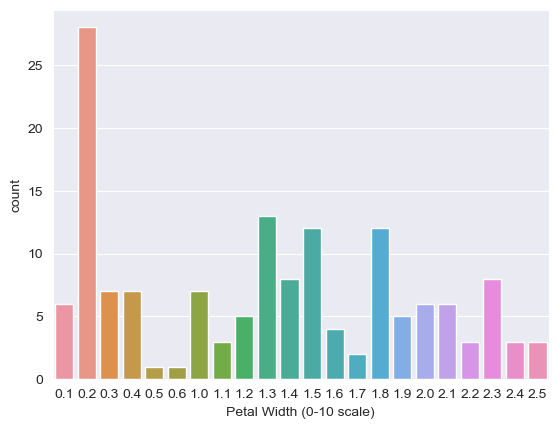

In [27]:
sns.countplot(x="PetalWidthCm", data=data)
plt.xlabel("Petal Width (0-10 scale)")
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

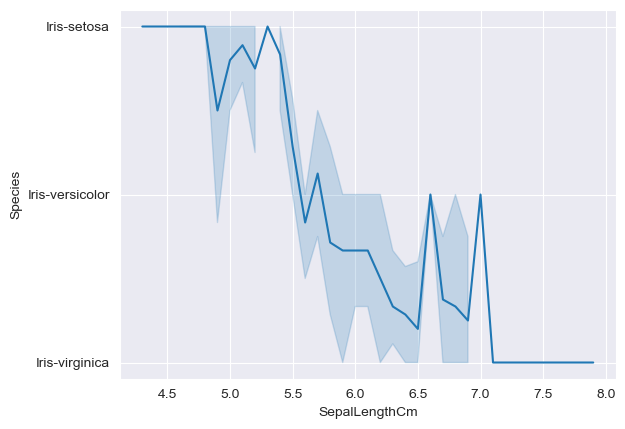

In [28]:
sns.lineplot(x=data["SepalLengthCm"], y=data["Species"])

<Axes: xlabel='SepalWidthCm', ylabel='Species'>

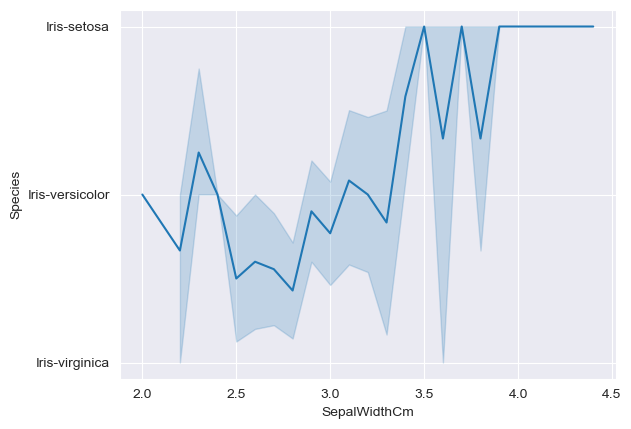

In [29]:
sns.lineplot(x=data["SepalWidthCm"], y=data["Species"])

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

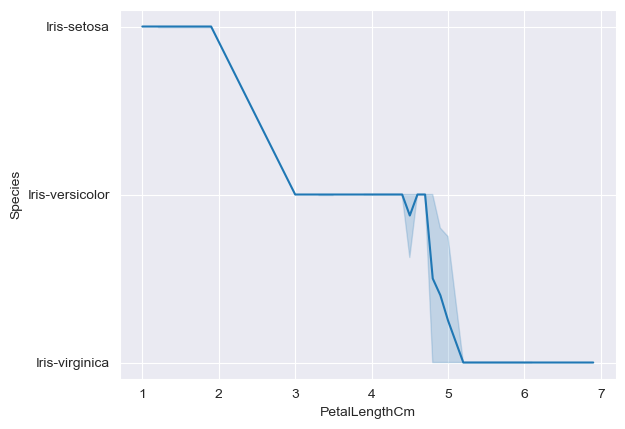

In [30]:
sns.lineplot(x=data["PetalLengthCm"], y=data["Species"])

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

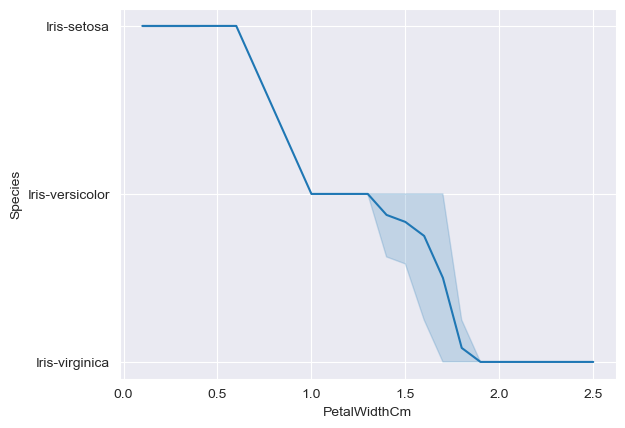

In [31]:
sns.lineplot(x=data["PetalWidthCm"], y=data["Species"])

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

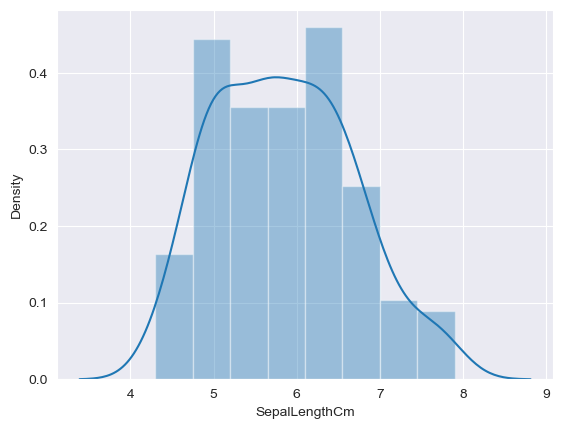

In [32]:
sns.distplot(data['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

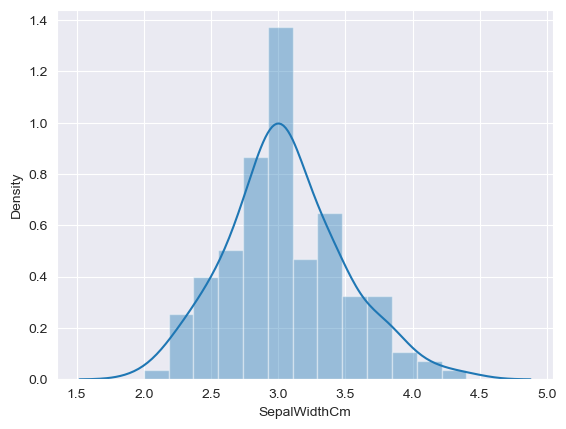

In [33]:
sns.distplot(data['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

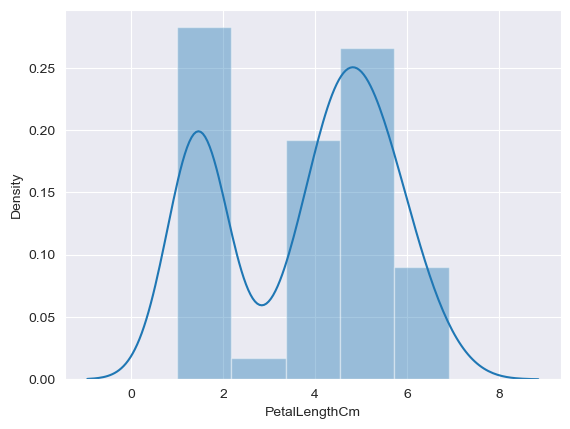

In [34]:
sns.distplot(data['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

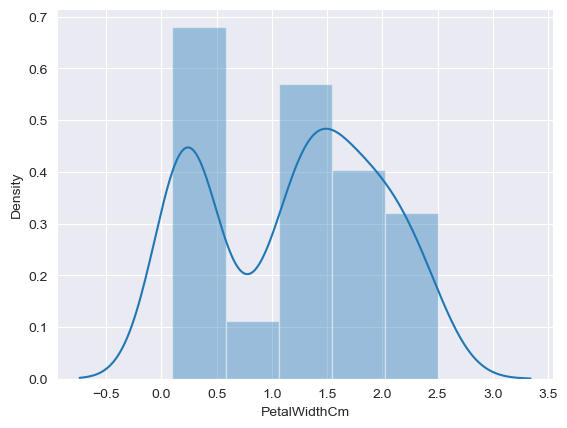

In [35]:
sns.distplot(data['PetalWidthCm'])

<Axes: >

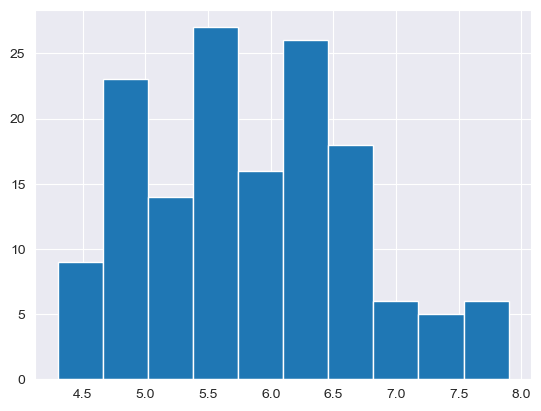

In [36]:
data['SepalLengthCm'].hist()

<Axes: >

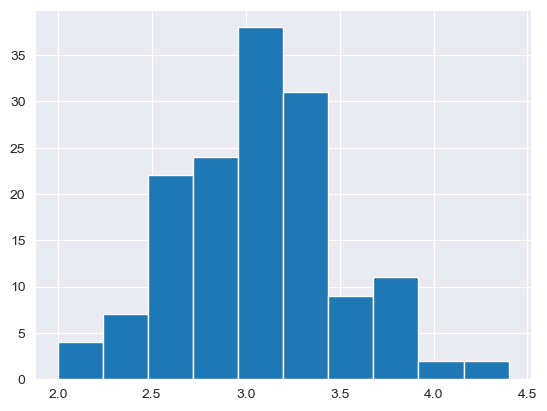

In [37]:
data['SepalWidthCm'].hist()

<Axes: >

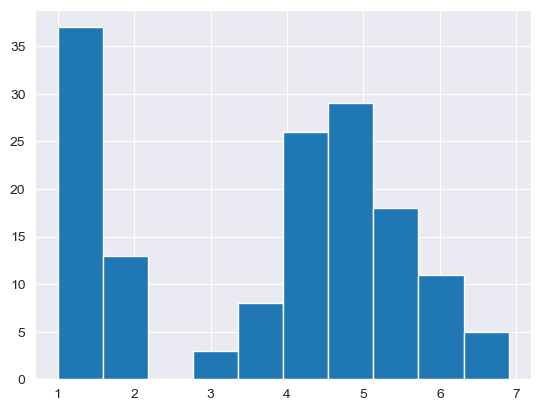

In [38]:
data['PetalLengthCm'].hist()

<Axes: >

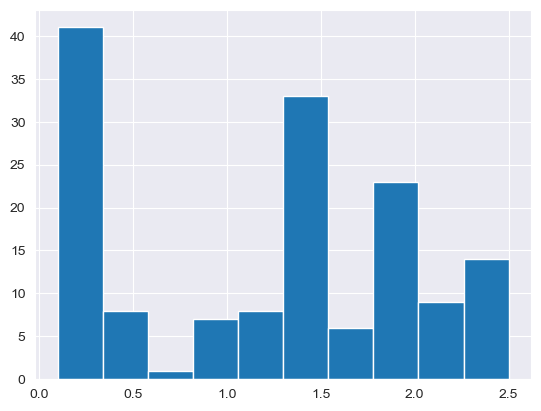

In [39]:
data['PetalWidthCm'].hist()

SepalLengthCm       Axes(0.125,0.11;0.133621x0.77)
SepalWidthCm     Axes(0.285345,0.11;0.133621x0.77)
PetalLengthCm     Axes(0.44569,0.11;0.133621x0.77)
PetalWidthCm     Axes(0.606034,0.11;0.133621x0.77)
dtype: object

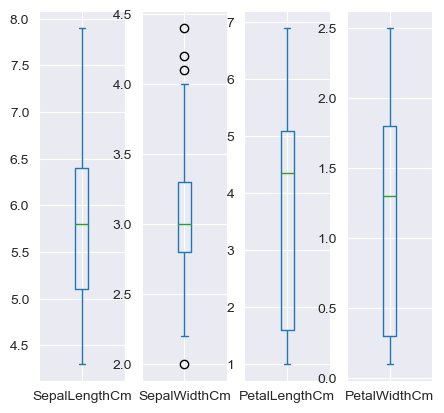

In [48]:
data.plot(kind ='box',subplots = True, layout =(1,5),sharex = False)

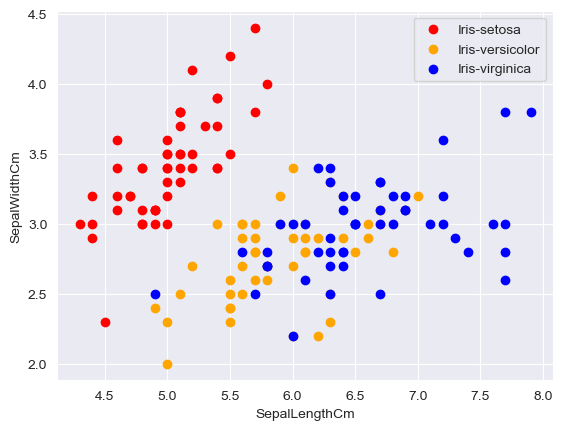

In [41]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

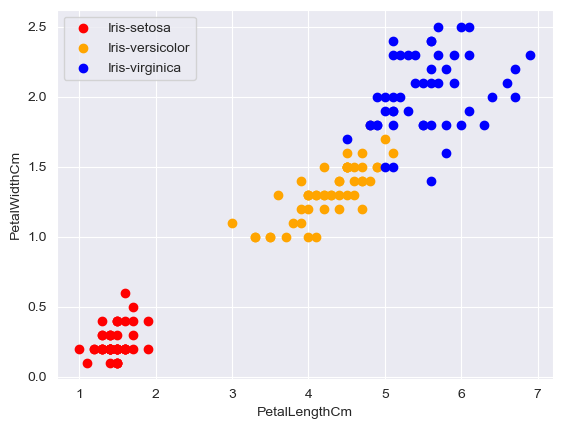

In [42]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

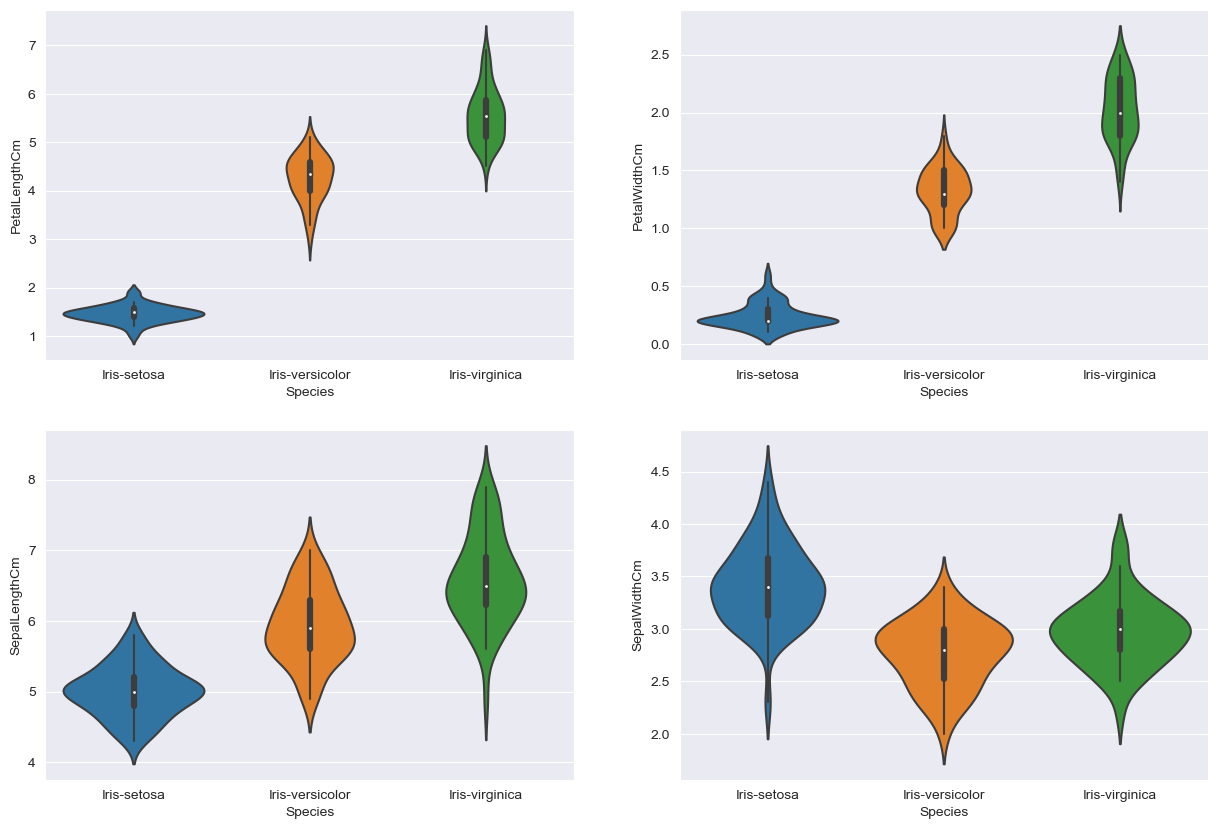

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [44]:
n = len(data[data['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

n1 = len(data[data['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

n2 = len(data[data['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


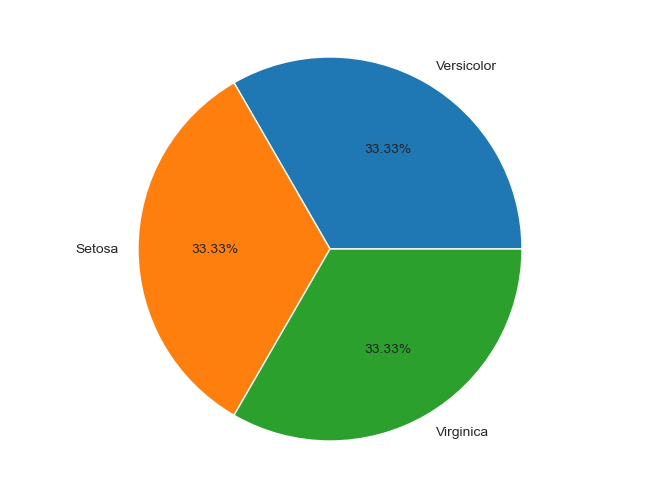

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

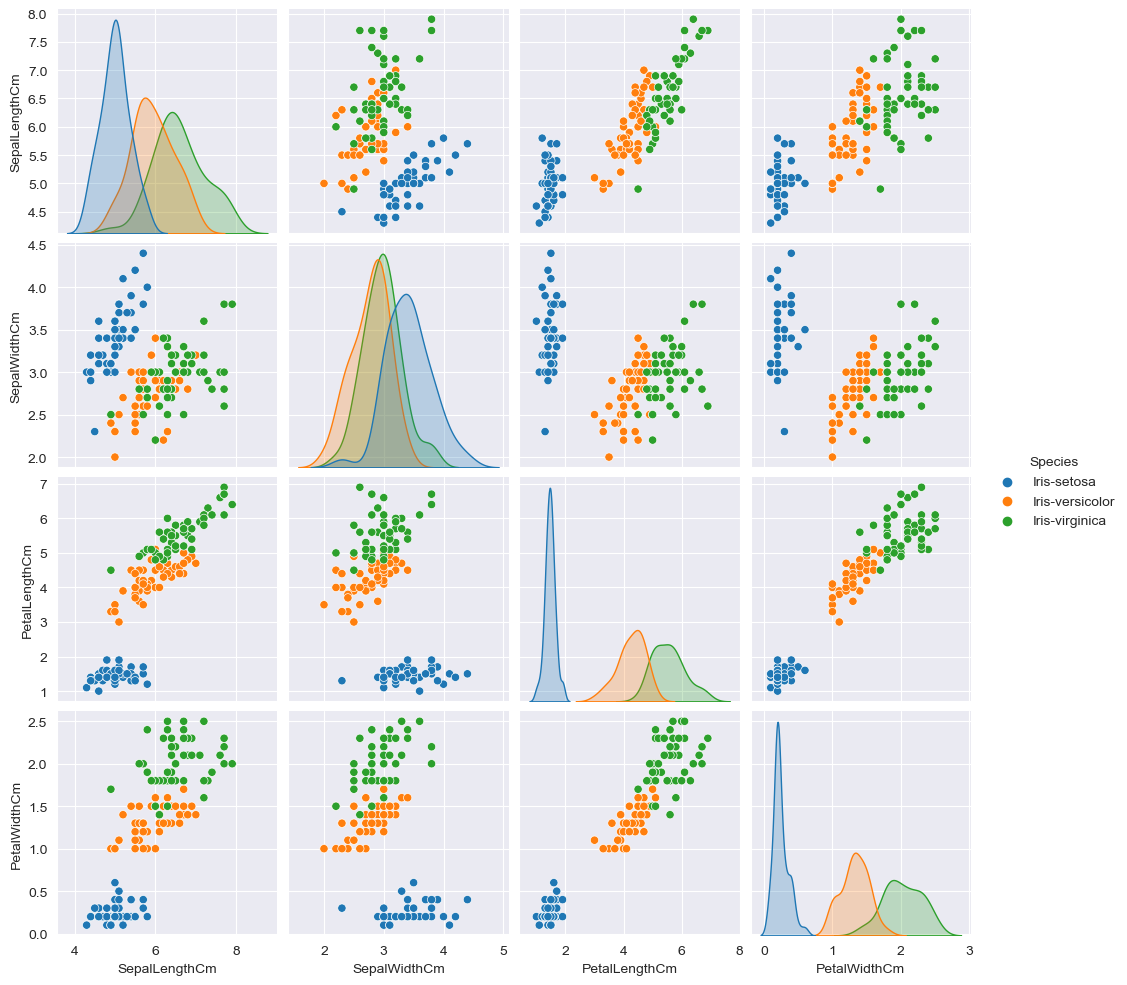

In [46]:
sns.pairplot(data,hue='Species')

<Axes: >

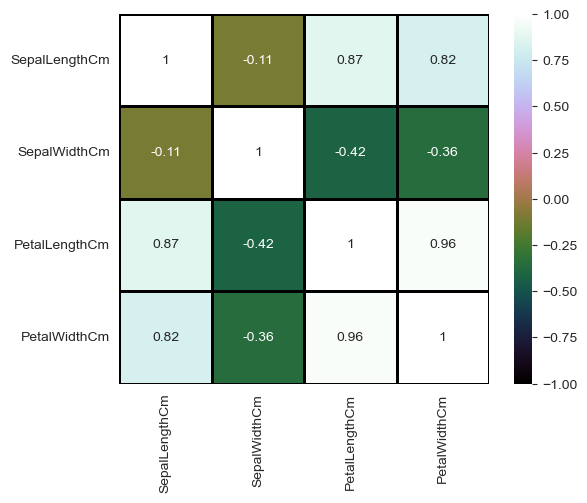

In [47]:
sns.heatmap(data.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1, 
            cbar_kws={"orientation": "vertical"},cbar=True)

# Model Building

In [49]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

y = data['Species']

In [50]:
# sampling of data--
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return  X_train,X_test,y_train,y_test

In [51]:
# calling the train_test function--
X_train,X_test,y_train,y_test=train_test(X,y)

(120, 4)
(120,)
(30, 4)
(30,)


# Logistic Regression

In [52]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred1))

Accuracy: 1.0


In [53]:
confusion_mat = confusion_matrix(y_test,pred1)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,pred1))

Confusion matrix: 
 [[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



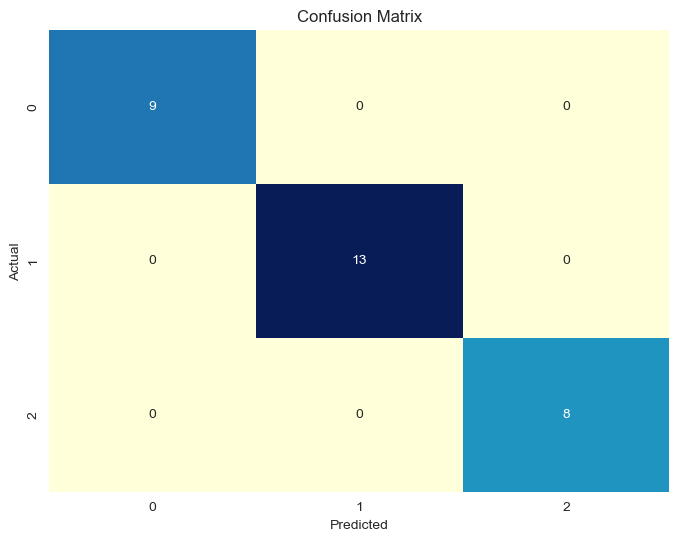

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN Classification

In [55]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred2))

Accuracy: 0.9666666666666667


# Support Vector Classification

In [56]:
model3 = SVC()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred3))

Accuracy: 1.0


# Decision Tree

In [57]:
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred4))

Accuracy: 1.0


# Naive Bayes

In [58]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred5))

Accuracy: 1.0


In [22]:
sepal_length = float(input("Enter Sepal Length: "))
sepal_width = float(input("Enter Sepal Width: "))
petal_length = float(input("Enter Petal Length: "))
petal_width = float(input("Enter Petal Width: "))

# Standardize the user input
user_input = scaler.transform([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])

# Predict the species
predicted_species = model2.predict(user_input)

print(f"Predicted species: {predicted_species[0]}")

Enter Sepal Length: 5.1
Enter Sepal Width: 3.5
Enter Petal Length: 1.4
Enter Petal Width: 0.2
Predicted species: Iris-setosa
